In [1]:
# Import required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from openbb_terminal.sdk import openbb

In [2]:
# Download data since 2000.
# SP500 ticker is "^GSPC",
name = (input("Enter ticker of your choice")).upper()
df = openbb.stocks.load(name, start_date="2000-01-01", end_date="2023-02-01")["Adj Close"]

Enter ticker of your choice ^GSPC


Loading Daily data for ^GSPC with starting period 2000-01-03.

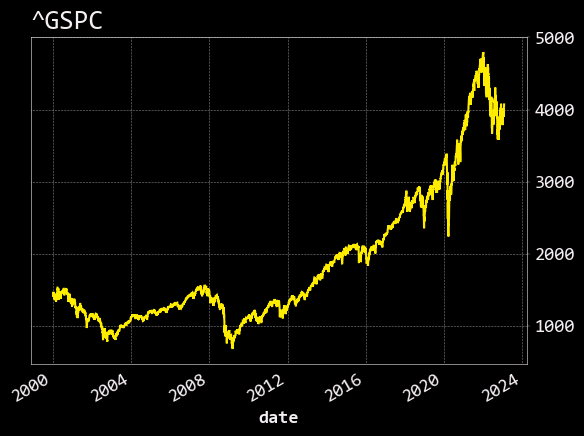

In [3]:
# Plot the data
df.plot(title=f'{name}');

# Save the figure.
plt.savefig(f"./Images/{name}AdjClosePlot.jpg")

In [4]:
# Calculate the hurst exponent
def get_hurst_exponent(ts, max_lag=20):
    lags = range(2, max_lag)
    tau = [np.std(np.subtract(ts[lag:], ts[:-lag])) for lag in lags]
    
    return np.polyfit(np.log(lags), np.log(tau), 1)[0]

In [5]:
# Take a look at how the lag parameter impacts the Hurst exponent.
for lag in [20, 100, 250, 500, 1000]:
    hurst_exp = get_hurst_exponent(df.values, lag)
    print(f"{lag} lags: {hurst_exp:.4f}")

20 lags: 0.4749
100 lags: 0.4324
250 lags: 0.4789
500 lags: 0.4897
1000 lags: 0.4633


In [6]:
# zoom in on a specific period in time.
shorter_series = df.loc["2005":"2007"].values
for lag in [20, 100, 250, 500]:
    hurst_exp = get_hurst_exponent(shorter_series, lag)
    print(f"{lag} lags: {hurst_exp:.4f}")

20 lags: 0.3989
100 lags: 0.3215
250 lags: 0.2507
500 lags: 0.1258
